v.20250131

# Working with Jupyter Notebooks
In this notebook we are going to work with Jupyter Notebooks. We will:
1. Start Jupyter Notebooks.
2. Load different TF databases.
3. Do some simple word-based queries.
4. Export query results to TSV files.

# Starting a Jupyter Notebook
There are different ways to open notebooks within jupyter:
1. You can either open the terminal/prompt and type

>```jupyter lab``` (I prefer this method over ```jupyter notebook``` as it allows for easier maneuvering within a notebook and between several open notebooks)
>
>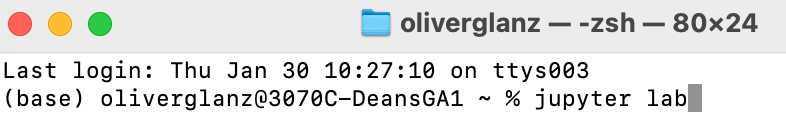
>

    This will open  the jupyter environment and a new notebook in your default webbrowser.
2. Or you open the Anaconda Navigator and click on *Launch* in the juypter notebook box or the JupyterLab box (preferred):

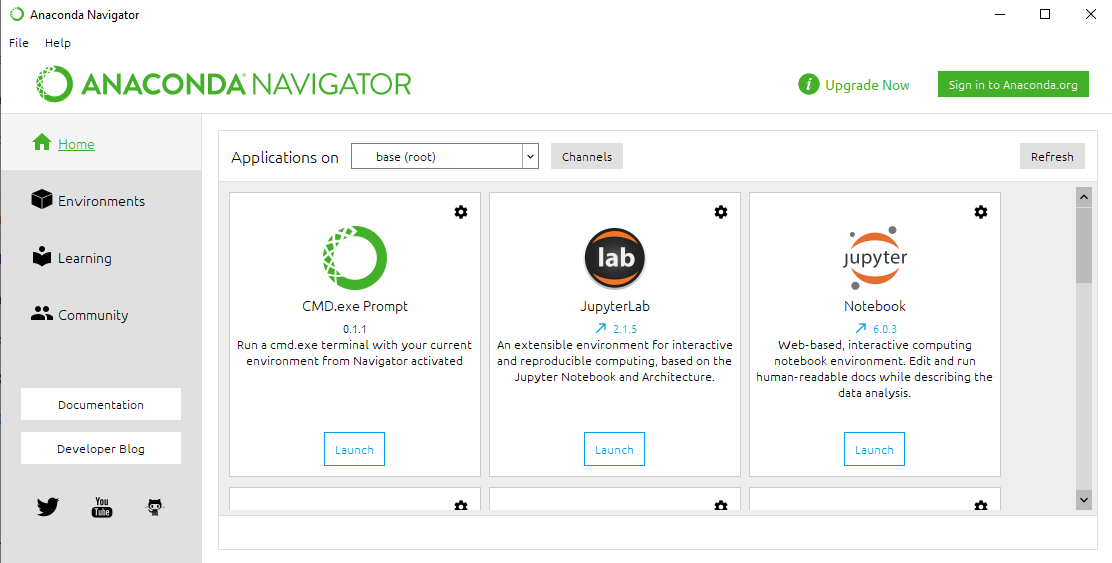



If you have a dedicated folder within which you want to work. You can first `cd` into that folder in your terminal and then launch the jupyter command. In my case this looks like this:
>```cd D:\OneDrive\1200_Research\Fabric-Text```
>
>```jupyter lab```

Once you have executed the command or clicked the launch button the jupyter environment will open in your webbrowser. Open a new notebook and copy/paste the code cells from this notebook into your own notebook or download this notebook to your machine and open it as a jupyter notebook within your jupyter lab/notebook environment.

## Getting the TF workbench ready
The first thing we need to do in our jupyter notebook is to
1. load the TF program
2. load the TF database

In [97]:
# First we load the TF program
from tf.fabric import Fabric
from tf.app import use

In [99]:
# Now we load a few databases
BHS = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')
#BHSa2017 = use('etcbc/bhsa', version='2017')
#BHSaLatest = use('etcbc/bhsa:latest')
#BHSaC = use('etcbc/bhsa', version='c', mod='CenterBLC/BHSaddons/tf')
LXX = use("CenterBLC/LXX", version="1935")
DSS = use('etcbc/dss')
GNT = use ("CenterBLC/N1904", version="1.0.0", mod="CenterBLC/N1904/BOLcomplement/tf/", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,57,10941.98,100
chapter,1192,523.23,100
verse,30371,20.54,100
subverse,30419,20.50,100
word,623693,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/viewtypes.md#start) for more information on viewtypes

We have now available: BHSA, Rahlf's LXX, Dead Sea Scrolls (DSS), and Nestle 1904 GNT. We are ready to query these databases!

# Looking up a Specific Text

In [103]:
# Genesis 20:1
Genesis20_1 = '''
verse book=Genesis chapter=20 verse=1
   word 
'''
Genesis20_1  = BHS.search(Genesis20_1)
BHS.show(Genesis20_1, start=1, end=1, extraFeatures={'function', 'lex_utf8'}, condensed=True)

  0.09s 19 results


Alternatively, we can write (watch the container/indentation structure!):

In [106]:
# Genesis 20:1
Genesis20_1 = '''
book book=Genesis 
 chapter chapter=20 
   verse verse=1
    word 
'''
Genesis20_1  = BHS.search(Genesis20_1)
BHS.show(Genesis20_1, start=1, end=1, extraFeatures={'function', 'lex_utf8'}, condensed=True)

  0.09s 19 results


In [108]:
# Genesis 20:1 in LXX
Genesis20_1 = '''
book book=Gen
 chapter chapter=20 
   verse verse=1
    word lex lex_utf8
'''
Genesis20_1  = LXX.search(Genesis20_1)
LXX.show(Genesis20_1, start=1, end=1, multiFeatures=False, condensed=True)

  0.45s 21 results


In [109]:
# John 1:1 in GNT
John1_1 = '''
book book=John
 chapter chapter=1 
   verse verse=1
    word lemma
'''
John1_1  = GNT.search(John1_1)
GNT.show(John1_1, start=1, end=1, multiFeatures=False, condensed=True)

  0.10s 17 results


In [112]:
TheOTinDSS = '''
scroll
    word book=Gen chapter=1 verse=1
'''
TheOTinDSS  = DSS.search(TheOTinDSS)
DSS.show(TheOTinDSS, start=1, end=2, condensed=True, fmt='layout-orig-full')

  0.19s 27 results


# Some simple word based queries...

## Lemma Searches
Lets search in the BHS the word Abram (>BRM/) and Abraham (>BRHM/) by typing

```word lex=>BRHM/|>BRM/```

The `|` stands for the AND-OR. Thus, we are searching for Abraham **and/or** Abram.

The feature **lex** of the object type **word** allows us to write Hebrew words in transliteration. In the next workshops we will get to know many more features and get introduced into the database.

In [116]:
# Searching for "Abram" and "Abraham" in the BHS
BHSAbrahamSearch = '''
chapter book=Genesis chapter=17
   word  lex=>BRHM/|>BRM/
'''
BHSAbrahamSearch  = BHS.search(BHSAbrahamSearch)
BHS.table(BHSAbrahamSearch, start=1, end=1, extraFeatures={'function', 'lex_utf8'}, condensed=True)

  0.19s 14 results


n,p,verse,word,word
1,Genesis 17:1,,אַבְרָ֗ם,אַבְרָ֔ם


In [118]:
# Searching for "Abraham" in the LXX
LXXAbrahamSearch = '''
word lex=Abram|Abraam bol_lexeme_dict translit_SBL
'''
LXXAbrahamSearch  = LXX.search(LXXAbrahamSearch)
LXX.table(LXXAbrahamSearch, start=65, end=66, condensed=False, multiFeatures=False)

  0.36s 278 results


n,p,word
65,Gen 17:5,Αβραμ
66,Gen 17:5,Αβρααμ


In [119]:
# Searching for "Abraham" in the GNT
NTAbrahamSearch = '''
word lemmatranslit=Abram|Abraam
'''
NTAbrahamSearch  = GNT.search(NTAbrahamSearch)
GNT.table(NTAbrahamSearch, start=2, end=2, condensed=False)

  0.05s 73 results


n,p,word
2,Matthew 1:2,Ἀβραὰμ


In [122]:
DSSAbrahamIn1Qisaa = '''
scroll scroll=1Qisaa
 line
  word lex_etcbc=>BRHM/
'''

DSSAbrahamIn1Qisaa = DSS.search(DSSAbrahamIn1Qisaa)
DSS.show(DSSAbrahamIn1Qisaa, start=1, end=1, withNodes=True, colorMap={1: 'yellow', 2: 'cyan', 3: 'magenta', 4: 'green'}, fmt='layout-orig-full')

  0.20s 4 results


And now lets find a few words in an exact order.

In [125]:
translit = '''
verse
    w1:word lemmatranslit=prin
    w2:word lemmatranslit=Abraam
    w3:word lemmatranslit=ginomai
    w4:word lemmatranslit=ego
    w5:word lemmatranslit=eimi

w1 <: w2
w2 <: w3
w3 <: w4
w4 <: w5
'''
translit  = GNT.search(translit)
GNT.show(translit, start=1, end=7, extraFeatures={'lemma'}, condensed=True)

  0.25s 1 result


## Morphology Searches
Lets search for 1sg Futurum-I of εἰμί.

In [128]:
eimi = '''
word number=singular person=p1 tense=future lemmatranslit=eimi
'''
eimi  = GNT.search(eimi)
GNT.table(eimi, start=1, end=1, condensed=True, multiFeatures=False)

  0.07s 13 results


n,p,verse,word
1,Matthew 17:17,,ἔσομαι;


Lets look up a variety of morphological features in John 1:1:

In [131]:
# Morph features in John 1:1
ShowMorph = '''
verse book=John chapter=1 verse=1
   word case* gender* mood* number* person* sp* voice* tense* lemma* cls=verb
'''
ShowMorph  = GNT.search(ShowMorph)
GNT.table(ShowMorph, start=1, end=1, condensed=True, multiFeatures=False)

  0.18s 3 results


n,p,verse,word,word,word
1,John 1:1,,ἦν,ἦν,ἦν


## Word-Frequency Searches
Let us see how often each word in Matthew 1:1-2 appears in the entire NT. For this we use in the `show` function the `extraFeatures` option. We want to show both the Greek lexemes (**bol_lemma**) as well as the frequecy of distribution (**bol_lemma_occ**) by writing:
```python
extraFeatures={'bol_lemma', 'bol_lemma_occ'}
```

In [134]:
# Checking Frequency Counts
freqcount = '''
book book=Matthew
    chapter chapter=1
        verse verse=1|2
            word
'''
freqcount  = GNT.search(freqcount)
GNT.show(freqcount, start=1, end=1, extraFeatures={'bol_lemma', 'bol_lemma_occ', 'bol_frequency_rank', 'bol_lemma_dict', 'bol_gloss_EN'}, condensed=True)

  0.08s 26 results


Do you see the difference between `condensed=False` and `condensed=True`?

Imagine your Greek class knows all the Greek vocab down to a frequency of 10. Next week you want to translate with them John 3. Thus, they have to prepare by learning all words that appear with a frequency of <10. You want to create a vocab list for them. We have to start with identifying the words first by using the feature `bol_lemma_occ`:

In [138]:
# Searching for all words that appear leass than 10 times in John 3
NTfreq = '''
book book=John
    chapter chapter=3
        word bol_lemma_occ<10 bol_gloss_EN* bol_lemma*

'''
NTfreq  = GNT.search(NTfreq)
GNT.table(NTfreq, start=1, end=16, extraFeatures={'bol_frequency_rank'}, condensed=False)

  0.15s 16 results


n,p,book,chapter,word
1,John 3:1,John,John 3,Νικόδημος
2,John 3:4,John,John 3,Νικόδημος
3,John 3:4,John,John 3,γέρων
4,John 3:8,John,John 3,"πνεῖ,"
5,John 3:9,John,John 3,Νικόδημος
6,John 3:12,John,John 3,ἐπίγεια
7,John 3:16,John,John 3,μονογενῆ
8,John 3:18,John,John 3,μονογενοῦς
9,John 3:20,John,John 3,φαῦλα
10,John 3:22,John,John 3,διέτριβεν


There is a total of 16 words in John 3 that appear less frequent than 10x. In order to produce a Vocab List we have to export our search results. How to do this, we will learn in one of our next notebooks... ;-)

# Query-result-export as a preparation for Data Mining
We have to export our query results into TSV files to that we can do some further data analysis. The fille paths will have to be written differently, depending on whether you are working in a Windows or MacOS environment. 

In a **Windows** environment your patch would look something like this:
```python
D:/OneDrive/1200_AUS-research/Fabric-TEXT
```

A TF export command could look like this:
```python
BHS.export(BHSAbrahamSearch, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='BHSAbrahamSearch.tsv')
```

In a **MacOS** environment your path would look something like this:
```python
/Users/glanz/OneDrive/1200_AUS-research/Fabric-TEXT
```

A TF export command could look like this:
```python
BHS.export(BHSAbrahamSearch, toDir='/Users/glanz/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='BHSAbrahamSearch.tsv')
```

## Query Export
Lets export our query results of our Abraham queries for both OT and NT:

In [14]:
#Command for Windows environment:
#BHS.export(BHSAbrahamSearch, toDir='D:\OneDrive - Andrews University\1200_AUS-research\Fabric-TEXT\course_PhD-workshop\data-export', toFile='BHSAbrahamSearch.tsv')

In [71]:
#Command for MacOS environment:
BHS.export(BHSAbrahamSearch, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export/', toFile='BHSAbrahamSearch.tsv')

In [16]:
#Command for Windows environment:
#NT.export(NTAbrahamSearchLex, toDir="D:\OneDrive - Andrews University\1200_AUS-research\Fabric-TEXT\course_PhD-workshop\data-export", toFile='NTAbrahamSearchLex.tsv')

In [73]:
#Command for MacOS environment:
GNT.export(NTAbrahamSearch, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export/', toFile='NTAbrahamSearch.tsv')

## Loading Data Analysis Tools
Lets now read the TSV files and do some further analysis of them. To enable data analysis functions we need to load some further python modules:

In [78]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

## Creating Dataframe of exported Query Results

Now we can load our TSV files as pandas dataframes

In [82]:
#Command for Windows environment:

#BHSAbrahamSearch=pd.read_csv("D:\OneDrive - Andrews University\1200_AUS-research\Fabric-TEXT\course_PhD-workshop\data-export/BHSAbrahamSearch.tsv",delimiter='\t',encoding='utf-16')
#pd.set_option('display.max_columns', 50)
#BHSAbrahamSearch.head()

In [84]:
#Command for MacOS environment:

BHSAbrahamSearch=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export/BHSAbrahamSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSAbrahamSearch.head()

,R,S1,S2,S3,NODE1,TYPE1,book1,chapter1,NODE2,TYPE2,TEXT2,lex2
0,1,Genesis,17,1,426646,chapter,Genesis,17,7326,word,אַבְרָ֔ם,>BRM/
1,2,Genesis,17,1,426646,chapter,Genesis,17,7337,word,אַבְרָ֗ם,>BRM/
2,3,Genesis,17,3,426646,chapter,Genesis,17,7364,word,אַבְרָ֖ם,>BRM/
3,4,Genesis,17,5,426646,chapter,Genesis,17,7389,word,אַבְרָ֑ם,>BRM/
4,5,Genesis,17,5,426646,chapter,Genesis,17,7393,word,אַבְרָהָ֔ם,>BRHM/


In [86]:
#Command for Windows environment:

#NTAbrahamSearchLex=pd.read_csv('D:\OneDrive - Andrews University\1200_AUS-research\Fabric-TEXT\course_PhD-workshop\data-export/NTAbrahamSearchLex.tsv',delimiter='\t',encoding='utf-16')
#pd.set_option('display.max_columns', 50)
#NTAbrahamSearchLex.head()

In [88]:
#Command for MacOS environment:
NTAbrahamSearchLex=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export/NTAbrahamSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
NTAbrahamSearchLex.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1
0,1,Matthew,1,1,8,word,Ἀβραάμ.,Matthew
1,2,Matthew,1,2,9,word,Ἀβραὰμ,Matthew
2,3,Matthew,1,17,252,word,Ἀβραὰμ,Matthew
3,4,Matthew,3,9,1033,word,Ἀβραάμ·,Matthew
4,5,Matthew,3,9,1048,word,Ἀβραάμ.,Matthew


# Assignments
1. Think of two words that you would like to search in both the BHS and the NT(Nestle 1904). For example יהוה/κύριος and אֱלֹהִים/θεός. Since you do not yet know how to write your word in a TF accaptable way you can simple look up the book/chapter/verse where they appear. In BHS this would look like:

```
book book=yourbook
 chapter chapter=yourchapter
  verse verse=yourverse
   word lex
```

    For Nestle1904 this would look like:
```
book book=yourbook
 chapter chapter=yourchapter
  verse verse=yourverse
   word lemma
```
    In both cases run the `show` command instead of the `table` command. This will enable you to copy paste the correct writing into your word search query.

2. Search for your words in both the BHS and the NT.
3. Export your TF queries with the Export function so that we can do some data-mining on it next time.

# Whats Next?: Complex Query building
1. We will learn how to do some Data-Mining in pandas.
2. We will learn how to visualize your data.

The next notebook can be found [here](https://nbviewer.org/github/oliverglanz/Text-Fabric/blob/master/Research-Workshop-Series/0200_PhD-Workshop_TF_003_data-mining_data-visualization.ipynb).